In [1]:
#visual data analysis
#drawing graphs to better understand data distribution

In [2]:
#imports

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

#drawings in svg are more legible
%config InlineBackend.figure_format = 'svg'

In [3]:
#read data
df = pd.read_csv('../dataset/telecom_churn.csv')

df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7525de6208>,
      dtype=object)

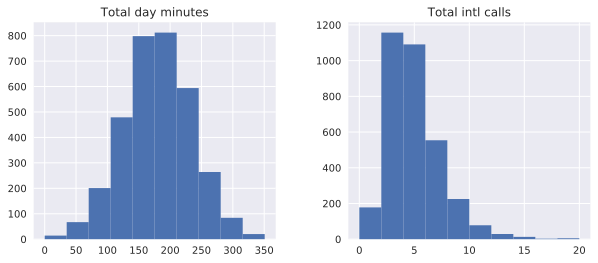

In [4]:
#draw histogram of features
features = ['Total day minutes', 'Total intl calls']
df[features].hist(figsize=(10,4))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7522b7c7f0>,
      dtype=object)

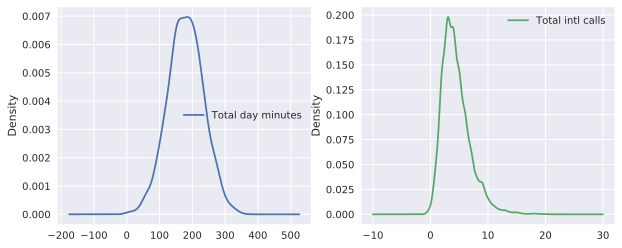

In [5]:
#smooth hist plots or density plots
df[features].plot(kind='density', subplots=True, layout=(1,2), sharex=False, figsize=(10,4))

/media/bootstrap/7a8d6d79-6559-450b-903c-e9240e856f5b/bootstrap/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


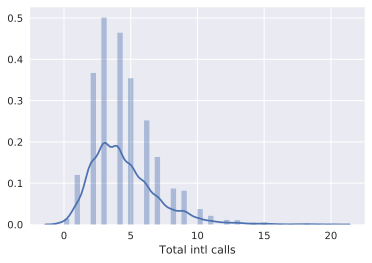

In [6]:
#using seaborn
sns.distplot(df['Total intl calls'])

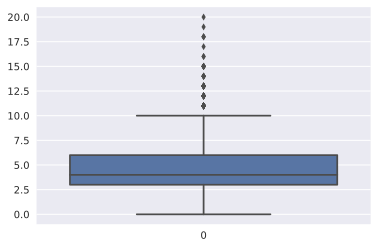

In [7]:
#boxplot
sns.boxplot(data=df['Total intl calls'])

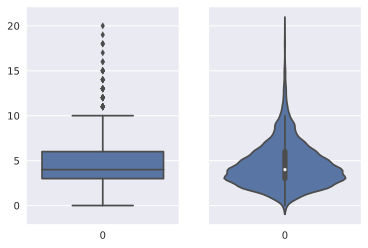

In [8]:
#violin plot a.k.a WTF!!

_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df['Total intl calls'], ax=axes[0]);
sns.violinplot(data=df['Total intl calls'], ax=axes[1]);

In [9]:
#describe
df[features].describe()

,Total day minutes,Total intl calls
count,3333.000000,3333.000000
mean,179.775098,4.479448
std,54.467389,2.461214
min,0.000000,0.000000
25%,143.700000,3.000000
50%,179.400000,4.000000
75%,216.400000,6.000000
max,350.800000,20.000000


In [10]:
#frequency table
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

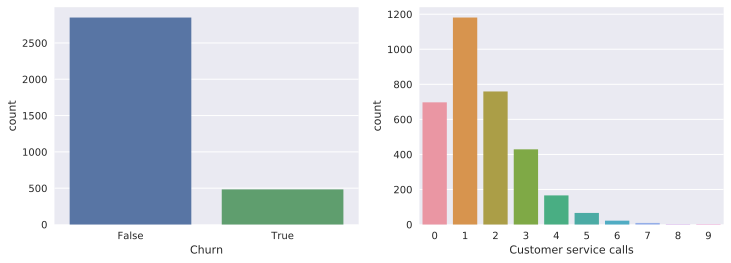

In [11]:
#bar plots
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x='Churn', data=df, ax=axes[0]);
sns.countplot(x='Customer service calls', data=df, ax=axes[1]);

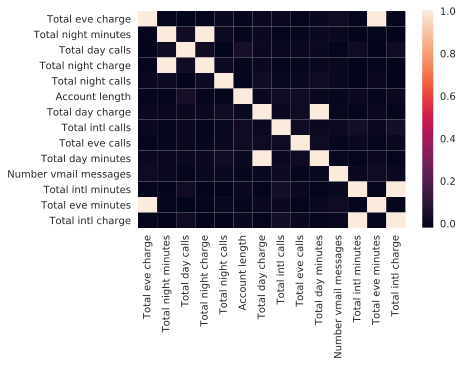

In [12]:
#corelation matrix heatmap
# Drop non-numerical variables
numerical = list(set(df.columns) - 
                 set(['State', 'International plan', 'Voice mail plan', 
                      'Area code', 'Churn', 'Customer service calls']))

# Calculate and plot
corr_matrix = df[numerical].corr() #corelation matrix
sns.heatmap(corr_matrix);

In [13]:
#from above we can see that some columns can be directly derived from other columns hence can be removed

numerical = list(set(numerical) - 
                 set(['Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']))

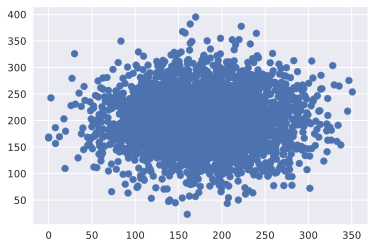

In [14]:
#scatter plot

plt.scatter(df['Total day minutes'], df['Total night minutes'])

/media/bootstrap/7a8d6d79-6559-450b-903c-e9240e856f5b/bootstrap/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/media/bootstrap/7a8d6d79-6559-450b-903c-e9240e856f5b/bootstrap/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


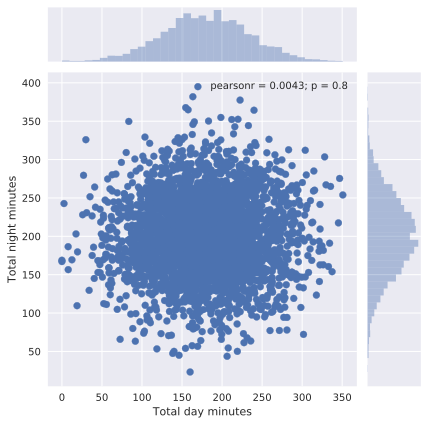

In [15]:
#scatterplot looks like ellipse aligned with axis so it seems that features are uncorellated
#using seaborn

sns.jointplot(x='Total day minutes', y='Total night minutes', 
              data=df, kind='scatter');

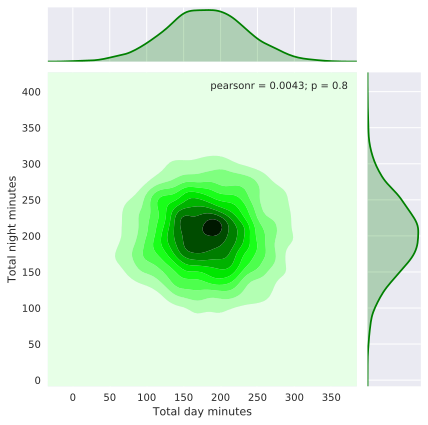

In [16]:
#a smooth variant of above scatter plot

sns.jointplot('Total day minutes', 'Total night minutes', data=df,
              kind="kde", color="g");

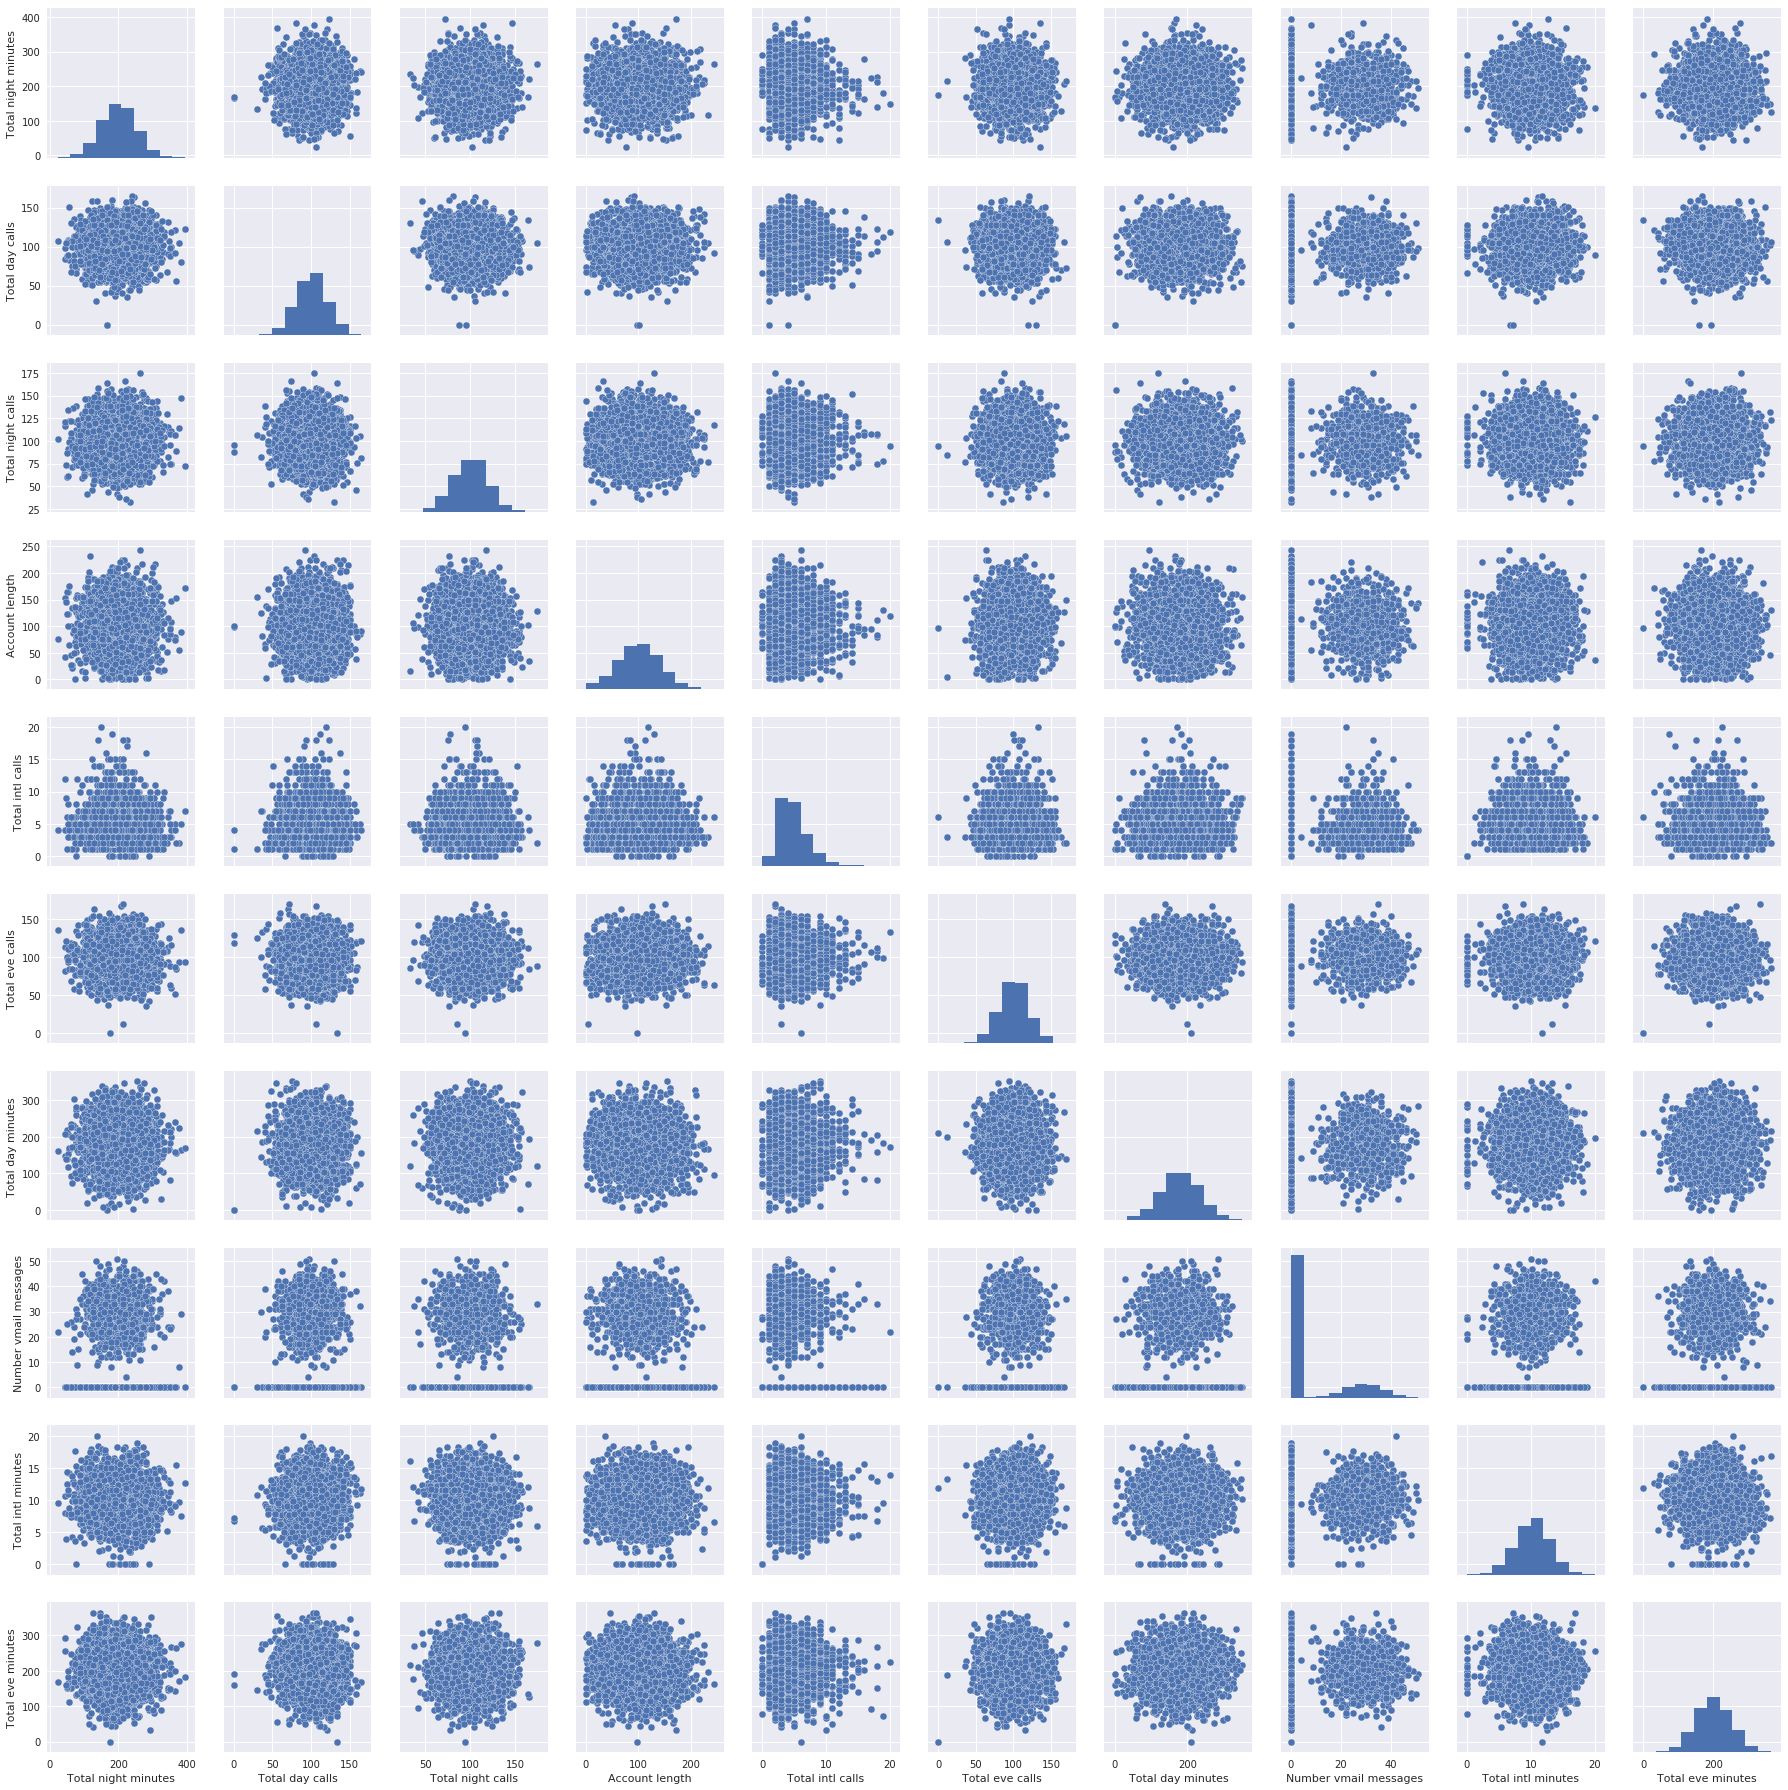

In [17]:
# `pairplot()` may become very slow with the SVG format
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[numerical]);